<a href="https://colab.research.google.com/github/FathimaNazarudeen/s3./blob/main/a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! /content/drive/MyDrive/autism

/bin/bash: /content/drive/MyDrive/autism: No such file or directory


In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255)
valid_datagen=ImageDataGenerator(rescale=1./255)

In [3]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
import Augmentor
p = Augmentor.Pipeline("/content/drive/MyDrive/fathima/train")
p.flip_left_right(0.5)
p.black_and_white(0.1)
p.rotate(0.3, 10, 10)
p.skew(0.4, 0.5)
p.zoom(probability = 0.2, min_factor = 1.1, max_factor = 1.5)
p.sample(100)

Initialised with 2539 image(s) found.
Output directory set to /content/drive/MyDrive/fathima/train/output.

Processing <PIL.Image.Image image mode=RGB size=224x224 at 0x7F4319D3A310>: 100%|██████████| 100/100 [00:01<00:00, 81.56 Samples/s]


In [15]:
train_dir="/content/drive/MyDrive/fathima/train"
val_dir="/content/drive/MyDrive/fathima/valid"

In [16]:
train_data=train_datagen.flow_from_directory(train_dir, target_size=(224, 224), class_mode='binary', batch_size=1,seed=42)
valid_data=valid_datagen.flow_from_directory(val_dir, target_size=(224, 224), class_mode='binary',batch_size=1,seed=42)

Found 2639 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [17]:
model_1=tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(filters=10,
                                                           kernel_size=3,
                                                           activation="relu",
                                                           input_shape=(224,224,3)),
                                    tf.keras.layers.Conv2D(10,3,activation="relu"),
                                    tf.keras.layers.MaxPool2D(pool_size=2,
                                                              padding="valid"),
                                    tf.keras.layers.Conv2D(10,3,activation="relu"),
                                    tf.keras.layers.Conv2D(10,3,activation="relu"),
                                    tf.keras.layers.MaxPool2D(2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(2,activation="softmax")])

In [18]:
model_1.compile(loss="sparse_categorical_crossentropy",optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])

In [19]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [20]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=20)

In [21]:
model=model_1.fit(train_data,epochs=100,validation_data=valid_data,steps_per_epoch=50,callbacks=[callback])

Epoch 1/100
50/50 [==============================] - 12s 29ms/step - loss: 0.9154 - accuracy: 0.5200 - val_loss: 0.7010 - val_accuracy: 0.5000
Epoch 2/100
50/50 [==============================] - 1s 16ms/step - loss: 0.6930 - accuracy: 0.6000 - val_loss: 0.7023 - val_accuracy: 0.5400
Epoch 3/100
50/50 [==============================] - 1s 15ms/step - loss: 0.7029 - accuracy: 0.5400 - val_loss: 0.6963 - val_accuracy: 0.5300
Epoch 4/100
50/50 [==============================] - 1s 15ms/step - loss: 0.7849 - accuracy: 0.4800 - val_loss: 0.6956 - val_accuracy: 0.4800
Epoch 5/100
50/50 [==============================] - 1s 15ms/step - loss: 0.6915 - accuracy: 0.5200 - val_loss: 0.6913 - val_accuracy: 0.4900
Epoch 6/100
50/50 [==============================] - 1s 15ms/step - loss: 0.6917 - accuracy: 0.5000 - val_loss: 0.6940 - val_accuracy: 0.5300
Epoch 7/100
50/50 [==============================] - 1s 16ms/step - loss: 0.6910 - accuracy: 0.6000 - val_loss: 0.6907 - val_accuracy: 0.5200
Epoch

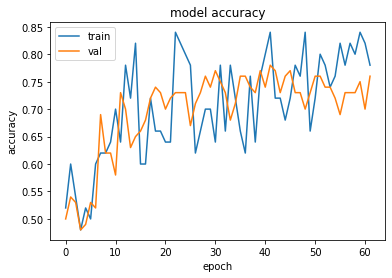

In [23]:
import matplotlib.pyplot as plt
import keras
from matplotlib import pyplot as plt
plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

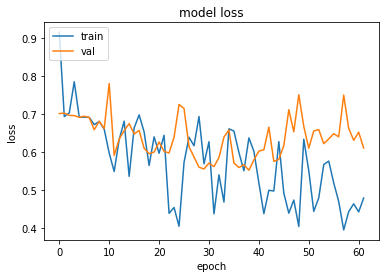

In [24]:
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')

plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [25]:
from tensorflow.keras.preprocessing import image

In [34]:
def predictImage(filename):
  img1=image.load_img(filename,target_size=(224,224))
  plt.imshow(img1)
  Y=image.img_to_array(img1)
  X=np.expand_dims(Y,axis=0)
  val=model_1.predict(X)
  val=str(val)
  print(val)
  #print(val[[0]])
  if val=="[[1. 0.]]":
    plt.xlabel("autism",fontsize=30)
  elif val=="[[0. 1.]]":
    plt.xlabel("not autism",fontsize=30)


1/1 [==============================] - 0s 17ms/step
[[0. 1.]]


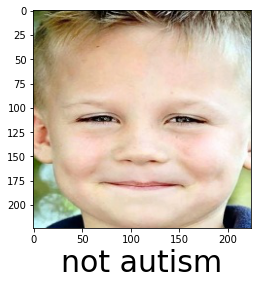

In [35]:
predictImage("/content/drive/MyDrive/autism/Autism/test/non_autistic/005.jpg")

In [36]:
AlexNet = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(224,224,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(2, activation='softmax')
])

In [37]:
AlexNet.compile(loss='sparse_categorical_crossentropy', optimizer=tf.optimizers.SGD(lr=0.001), metrics=['accuracy'])
AlexNet.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 54, 54, 96)        34944     
                                                                 
 batch_normalization (BatchN  (None, 54, 54, 96)       384       
 ormalization)                                                   
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 96)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 26, 26, 256)       614656    
                                                                 
 batch_normalization_1 (Batc  (None, 26, 26, 256)      1024      
 hNormalization)                                                 
                                                      

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [38]:
history_2=AlexNet.fit(train_data,
                      epochs=100,
                      
                      validation_data=valid_data,
                       callbacks=[callback]
                      )

Epoch 1/100
2639/2639 [==============================] - 33s 12ms/step - loss: 2.4127 - accuracy: 0.5438 - val_loss: 0.8854 - val_accuracy: 0.5300
Epoch 2/100
2639/2639 [==============================] - 32s 12ms/step - loss: 0.8510 - accuracy: 0.5889 - val_loss: 0.8047 - val_accuracy: 0.6100
Epoch 3/100
2639/2639 [==============================] - 31s 12ms/step - loss: 0.6921 - accuracy: 0.6502 - val_loss: 0.7093 - val_accuracy: 0.6700
Epoch 4/100
2639/2639 [==============================] - 31s 12ms/step - loss: 0.6474 - accuracy: 0.6684 - val_loss: 0.7201 - val_accuracy: 0.6400
Epoch 5/100
2639/2639 [==============================] - 31s 12ms/step - loss: 0.6009 - accuracy: 0.7044 - val_loss: 0.7090 - val_accuracy: 0.6200
Epoch 6/100
2639/2639 [==============================] - 31s 12ms/step - loss: 0.5701 - accuracy: 0.7158 - val_loss: 0.7410 - val_accuracy: 0.6000
Epoch 7/100
2639/2639 [==============================] - 32s 12ms/step - loss: 0.5324 - accuracy: 0.7416 - val_loss: 0

In [39]:
def predictImage(filename):
  img1=image.load_img(filename,target_size=(224,224))
  plt.imshow(img1)
  Y=image.img_to_array(img1)
  X=np.expand_dims(Y,axis=0)
  val=AlexNet.predict(X)
  val=str(val)
  print(val)
  #print(val[[0]])
  if val=="[[0. 1.]]":
    plt.xlabel("autism",fontsize=30)
  elif val=="[[1. 0.]]":
    plt.xlabel("not autism",fontsize=30)


1/1 [==============================] - 0s 117ms/step
[[1. 0.]]


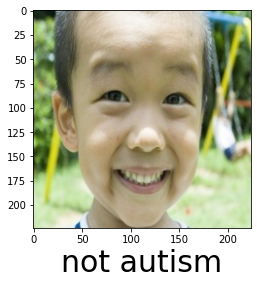

In [40]:
predictImage("/content/drive/MyDrive/autism/Autism/test/non_autistic/008.jpg")